In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [64]:
filename = "ex1data2.csv"
df = pd.read_csv(filename)
df

,input1,input2,output
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [65]:
def normalization(input,m,no_of_input) :
    for i in range(1,no_of_input+1) :
        input[:,i] = (input[:,i] - np.mean(input[:,i]))/np.std(input[:,i])
    #  input = (input - np.mean(input))/np.std(input)
    return input

In [66]:
def initialise_variable(m) :
    no_of_input = df.shape[1]-1

    input = np.array(df)[:,:no_of_input].reshape(m,no_of_input)
    input = np.c_[np.ones((m,1)),input]
    output = np.array(df["output"]).reshape(m,1)
    theta = np.zeros((3,1))


    print("Input shape:",input.shape)
    print("output shape:",output.shape)
    print("Theta shape:",theta.shape)

    return (input,output,theta,no_of_input)

In [67]:
def gradient_descent(theta,input,output,no_of_input,learning_rate,iterations) :
    for w in range(iterations) :
        hypothesis = np.dot(input,theta)
        cost = np.mean(np.square(hypothesis-output))/2

        cost_diff = learning_rate*np.mean((hypothesis-output)*input,axis=0)
        for i in range(no_of_input+1) :
            theta[i] = theta[i] - cost_diff[i]

    print("Final cost",cost)
    return theta

In [68]:
m = len(df)
X,y,theta,no_of_input = initialise_variable(m)
print("theta before gd : ",theta)

mod_input = normalization(X,m,no_of_input)
print("Modified input shape",mod_input.shape)

theta = gradient_descent(theta,mod_input,y,no_of_input,learning_rate=0.1,iterations=2000)
print("theta after gd : ",theta)

Input shape: (47, 3)
output shape: (47, 1)
Theta shape: (3, 1)
theta before gd :  [[0.]
 [0.]
 [0.]]
Modified input shape (47, 3)
Final cost 2043280050.6028287
theta after gd :  [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


In [69]:
print(np.dot(mod_input,theta))
print(mod_input)

[[356283.1103389 ]
 [286120.93063401]
 [397489.46984811]
 [269244.1857271 ]
 [472277.85514636]
 [330979.02101847]
 [276933.02614885]
 [262037.48402897]
 [255494.58235014]
 [271364.59918815]
 [324714.54068768]
 [341805.20024106]
 [326492.02609913]
 [669293.21223209]
 [239902.98686016]
 [374830.38333402]
 [255879.96102141]
 [235448.2452916 ]
 [417846.48160547]
 [476593.38604091]
 [309369.11319496]
 [334951.62386342]
 [286677.77333009]
 [327777.17551607]
 [604913.37413438]
 [216515.5936252 ]
 [266353.01492351]
 [415030.01477434]
 [369647.33504459]
 [430482.39959029]
 [328130.30083655]
 [220070.56444809]
 [338635.60808944]
 [500087.7365991 ]
 [306756.36373941]
 [263429.59076914]
 [235865.87731365]
 [351442.99009906]
 [641418.82407778]
 [355619.31031959]
 [303768.43288347]
 [374937.34065726]
 [411999.63329673]
 [230436.66102696]
 [190729.36558116]
 [312464.00137413]
 [230854.29304902]]
[[ 1.00000000e+00  1.31415422e-01 -2.26093368e-01]
 [ 1.00000000e+00 -5.09640698e-01 -2.26093368e-01]
 [ 1

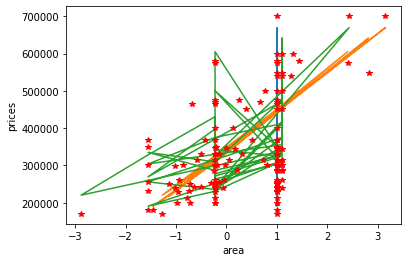

In [70]:
prediction_hp = np.dot(mod_input,theta)

plt.plot(X,prediction_hp,X,y,'r*')
plt.xlabel("area"); plt.ylabel("prices")
plt.show()